# 线性回归

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/logo.png" width=150>

在这节课上我们将学习线性回归。 我们将先理解它背后的数学基础原理再用python去实现它。 我们还将通过方法去讲解线性模型。



# 概述

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/linear.png" width=250>

$\hat{y} = XW$

*where*:
* $\hat{y}$ = 预测值 | $\in \mathbb{R}^{NX1}$ ($N$ 是样本的个数)
* $X$ = 输入 | $\in \mathbb{R}^{NXD}$ ($D$ 是特征的个数)
* $W$ = 权重 | $\in \mathbb{R}^{DX1}$ 

* **目标:**  通过线性模型的输入 $X$ 去预测 $\hat{y}$。模型将会寻找一条最优的线使得我们的预测值和目标值最为接近。训练数据 $(X, y)$ 用来训练这个模型并且通过随机梯度下降(SGD)学习权重 $W$。
* **优点:**
  * 计算简单。
  * 解释性强。
  * 可用于连续（continuous）和无序的类别（categorical）特征。
* **缺点:**
  * 线性模型只能用于线性可分的数据(针对于分类任务).
  * 但是通常来讲不会用于分类任务，仅仅用于回归问题。
* **其他:** 当然你也可以使用线性回归去做二分类任务，如果预测出的连续数值高于一个阈值它就属于一个特定的分类。但是我们在未来的课程中将会介绍可用于做二分类任务更好的模型，所以我们本次课程只会集中在怎么用线性回归去做回归任务。


# 训练

*步骤*: 
1. 随机初始化模型的权重$W$。
2. 将输入值 $X$ 传入模型并且得到预测值$\hat{y}$。
3. 通过损失函数来计算预测值$\hat{y}$和真实值$\hat{y}$之间的差距，从而得到损失值$J$。普遍在线性回归中用到的损失函数是均方误差(MSE)。这个函数计算出预测值和真实值之间的差距的平方($\frac{1}{2}$ 没有数学意义，只是在求导的时候可以正好和平方抵消，方便计算)。
  * $MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2$
4. 计算出对于模型权重的损失梯度$J(\theta)$
  * $J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 $
  * $\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)$
4. 我们使用学习率$\alpha$和一个优化方法(比如随机梯度下降)，通过反向传播来更新权重$W$。 一个简单的比方就是梯度可以告诉你在哪个方向上增加数值，然后通过减法来使得损失值$J(\theta)$越来越小。
  * $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
5. 重复2 - 4步直到模型表现最好（也可以说直到损失收敛）。

# 数据

我们将自己创建一些假数据应用在线性回归上。

In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 参数
args = Namespace(
    seed=1234,
    data_file="sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# 设置随机种子来保证实验结果的可重复性。
np.random.seed(args.seed)

In [3]:
# 生成数据,生成圆 X^2 + Y^2 = R^2
# y = sqrt(R^2 - X^2)
def generate_data(num_samples):
    X = np.array(range(num_samples))
    y = np.sqrt(10000 - X**2)
    return X, y

In [4]:
# 生成随机数据
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,100.000000
1,1.0,99.995000
2,2.0,99.979998
3,3.0,99.954990
4,4.0,99.919968


In [5]:
df

,X,y
0,0.0,100.000000
1,1.0,99.995000
2,2.0,99.979998
3,3.0,99.954990
4,4.0,99.919968
...,...,...
95,95.0,31.224990
96,96.0,28.000000
97,97.0,24.310492
98,98.0,19.899749


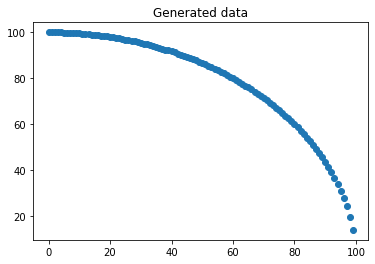

In [6]:
# 画散点图
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# Scikit-learn 实现方法

**注意**: `LinearRegression`类在Scikit-learn中使用的是正规方程法来做的拟合。然而，我们将会使用Scikit-learn中的随机梯度下降`SGDRegressor`类来拟合数据。我们使用这个优化方法是因为在未来的几节课程中我们也会使用到它。

In [7]:
# 调包
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/Users/xupeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.stochastic_gradient module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
# 划分数据到训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=args.test_size, 
    random_state=args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


In [9]:
print(type(df['X']))

<class 'pandas.core.series.Series'>


In [10]:
print(type(df["X"].values.reshape(-1,1)))

<class 'numpy.ndarray'>


In [11]:
X_train

array([[74.],
       [62.],
       [66.],
       [79.],
       [48.],
       [ 4.],
       [64.],
       [10.],
       [93.],
       [57.],
       [72.],
       [36.],
       [ 7.],
       [54.],
       [77.],
       [21.],
       [18.],
       [70.],
       [86.],
       [22.],
       [ 6.],
       [44.],
       [ 8.],
       [41.],
       [16.],
       [45.],
       [20.],
       [25.],
       [55.],
       [78.],
       [31.],
       [92.],
       [ 5.],
       [84.],
       [32.],
       [52.],
       [13.],
       [91.],
       [17.],
       [28.],
       [46.],
       [60.],
       [14.],
       [65.],
       [12.],
       [19.],
       [ 2.],
       [ 3.],
       [ 0.],
       [11.],
       [67.],
       [97.],
       [34.],
       [37.],
       [95.],
       [50.],
       [99.],
       [73.],
       [80.],
       [69.],
       [58.],
       [90.],
       [89.],
       [43.],
       [30.],
       [26.],
       [23.],
       [49.],
       [15.],
       [24.],
       [76.],
      

In [12]:
y_train

74    67.260687
62    78.460181
66    75.126560
79    61.310684
48    87.726849
        ...    
76    64.992307
53    84.799764
38    92.498649
83    55.776339
47    88.266641
Name: y, Length: 75, dtype: float64

In [13]:
y_train.values.reshape(-1,1)

array([[ 67.26068688],
       [ 78.46018098],
       [ 75.12655988],
       [ 61.31068422],
       [ 87.7268488 ],
       [ 99.91996797],
       [ 76.83749085],
       [ 99.49874371],
       [ 36.7559519 ],
       [ 82.16446921],
       [ 69.39740629],
       [ 93.29523032],
       [ 99.75469914],
       [ 84.16650165],
       [ 63.80438856],
       [ 97.77013859],
       [ 98.36666102],
       [ 71.41428429],
       [ 51.02940329],
       [ 97.54998719],
       [ 99.81983771],
       [ 89.79977728],
       [ 99.67948636],
       [ 91.20855223],
       [ 98.71170143],
       [ 89.3028555 ],
       [ 97.97958971],
       [ 96.82458366],
       [ 83.51646544],
       [ 62.57795139],
       [ 95.07365566],
       [ 39.19183588],
       [ 99.87492178],
       [ 54.25863987],
       [ 94.74175426],
       [ 85.41662602],
       [ 99.15139938],
       [ 41.46082488],
       [ 98.54440623],
       [ 96.        ],
       [ 88.79189152],
       [ 80.        ],
       [ 99.01515036],
       [ 75

我们需要标准化我们的数据（零均值和单位方差），以便正确使用SGD并在速度上优化。



标准化方差为1，符合正态分布
StandardScaler
https://blog.csdn.net/wzyaiwl/article/details/90549391

In [14]:
# 标准化训练集数据 (mean=0, std=1) 
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))



In [15]:
X_scaler

StandardScaler()

In [16]:
y_scaler

StandardScaler()

In [17]:
# 在训练集和测试集上进行标准化操作
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# 检查
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean 应该是 ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std 应该是 1

mean: [8.22952817e-17] -1.258252761241844e-17
std: [1.] 1.0


In [18]:
#########################################
#这是定义.均值为0,标准差为1的正态分布称为标准正态分布. ？？？？？？？
#彭旭？？？？
########################################

In [19]:
standardized_X_train, X_train

(array([[ 0.95724143],
        [ 0.5410495 ],
        [ 0.67978014],
        [ 1.13065473],
        [ 0.05549226],
        [-1.4705448 ],
        [ 0.61041482],
        [-1.26244884],
        [ 1.61621197],
        [ 0.3676362 ],
        [ 0.8878761 ],
        [-0.36069967],
        [-1.36649682],
        [ 0.26358822],
        [ 1.06128941],
        [-0.88093957],
        [-0.98498755],
        [ 0.81851078],
        [ 1.37343335],
        [-0.84625691],
        [-1.40117948],
        [-0.08323838],
        [-1.33181416],
        [-0.18728637],
        [-1.05435287],
        [-0.04855572],
        [-0.91562223],
        [-0.74220893],
        [ 0.29827088],
        [ 1.09597207],
        [-0.53411297],
        [ 1.58152931],
        [-1.43586214],
        [ 1.30406803],
        [-0.49943031],
        [ 0.1942229 ],
        [-1.15840086],
        [ 1.54684665],
        [-1.01967021],
        [-0.63816095],
        [-0.01387306],
        [ 0.47168418],
        [-1.1237182 ],
        [ 0

In [20]:
X_scaler.mean_, np.sqrt(X_scaler.var_)

(array([46.4]), array([28.83285163]))

In [21]:
# 初始化模型
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [22]:
# 训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(max_iter=100, penalty='none')

In [23]:
# 预测 (还未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [24]:
pred_test

array([ 85.195091  ,  88.39285895,  58.97339387,  71.76446564,
        48.10098287,  67.28759052,  56.41517952,  93.50928766,
        85.83464459,  83.91598383,  89.67196612,  73.04357282,
        70.48535847,  50.65919722,  74.96223359,  55.13607234,
        49.38009004, 110.13768096,  65.36892976,  58.33384028,
       105.02125225,  78.16000153,  92.23018048,  54.49651875,
        62.8107154 ])

# 评估

有很多种方法可以来评估我们模型表现的好坏。

In [40]:
import matplotlib.pyplot as plt

In [41]:
# 训练和测试集上的均方误差 MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 64.22, test_MSE: 86.37


除了使用MSE，如果我们只有一个特征向量，我们可以把他们可视化出来直观的评估模型。

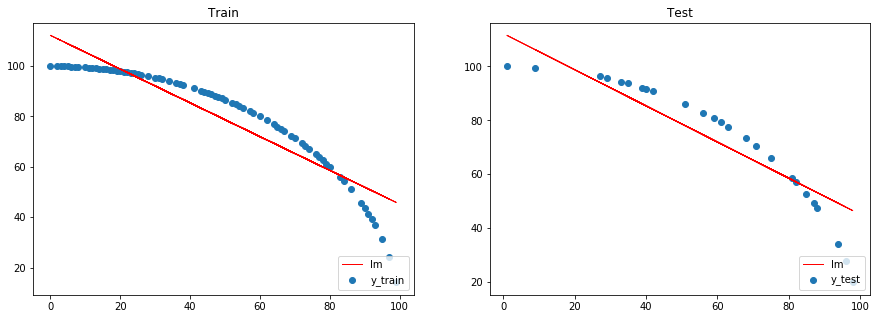

In [42]:
# 图例大小
plt.figure(figsize=(15,5))

# 画出训练数据
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 画出测试数据
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 显示图例
plt.show()

# 推论

In [44]:
# 传入我们自己的输入值
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[112.19373851 111.5236782  110.85361789]


,X,y
0,0.0,100.000000
1,1.0,99.995000
2,2.0,99.979998


# 可解释性

线性回归有很强的可解释性。每一个特征都有一个系数来控制对输出值y的影响大小。我们可以这样解释这个系数: 如果我们把x增加1, 我们将把y增加 $W$ (~3.65)。

**注意**: 因为我们在梯度下降时标准化了我们的输入和输出，我们需要对我们的系数和截距做一个反标准化。过程可见下方。

In [59]:
# 未标准化系数
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.64992275]
[10.00356788]


### 非标准化系数的证明：



注意我们的X和y都已经标准化了。

$\frac{\mathbb{E}[y] - \hat{y}}{\sigma_y} = W_0 + \sum_{j=1}^{k}W_jz_j$

$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = \hat{W}_0\sigma_y + \bar{y} - \sum_{j=1}^{k} \hat{W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}(\frac{\sigma_y}{\sigma_j})x_j $


# 正则化

正规化有助于减少过拟合。下方是L2正则化(ridge regression)。有很多正则化的方法他们都可以使我们的模型减少过拟合。对于L2正则化, 我们会减小那些值很大的权重。数值很大的权重将会使模型更加看中它们的特征，但是我们希望的是模型会公平的对待所有的特征而不是仅仅权重很大的几个。 当然还有其他的正则化方法比如L1(lasso regression)，它对于我们想创建更加稀疏的数据模型有好处，因为它会使得一些权重变成0，或者我们可以结合L2和L1正则化方法。

**注意**: 正则化不仅仅用于线性回归。它可以用于任何常规模型以及我们以后将会学到的模型。

* $ J(\theta) = = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 + \frac{\lambda}{2}\sum\sum W^2$
* $ \frac{\partial{J}}{\partial{W}}  = X (\hat{y} - y) + \lambda W $
* $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
where:
  * $\lambda$ 是正则化系数

In [60]:
# 初始化带有L2正则化的模型
lm = SGDRegressor(loss="squared_loss", penalty='l2', alpha=1e-2, 
                  max_iter=args.num_epochs)

In [61]:
# 训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [62]:
# 预测 (还未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [63]:
# 训练集和测试集的MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 1.09, test_MSE: 1.15


正则化对于我们在做的这个数据帮助很少，因为我们在创建数据的时候用的就是一个线性的函数。但是对于现实中的数据，正则化就可以帮助我们构建更好的模型。

In [37]:
# 未标准化系数
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.61384419]
[11.67785083]


# 类别变量

在我们的例子中，特征用的是连续的数值，那么假设我们要用类别的特征变量呢？一种选择就是使用独热编码来处理类别变量，这种方法用Pandas很容易实现，你可以用和上面相同的步骤来训练你的模型

In [38]:
# 创建类别特征
cat_data = pd.DataFrame(['a', 'b', 'c', 'a'], columns=['favorite_letter'])
cat_data.head()

,favorite_letter
0,a
1,b
2,c
3,a


In [39]:
dummy_cat_data = pd.get_dummies(cat_data) #独热编码 one-hot encoding，与dummy变量不同要注意。
dummy_cat_data.head()

,favorite_letter_a,favorite_letter_b,favorite_letter_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


现在你可以拼接上连续特征变量来训练线性模型。

# TODO

- 多项式回归
- 一个简单的用正规方程的例子(sklearn.linear_model.LinearRegression)来分析优点和缺点，并且和随机梯度下降线性回归做对比。



- 参考
- ref
- https://blog.csdn.net/weixin_40040404/article/details/81319121

In [64]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as line_mode
import sklearn.pipeline as spl             # 管线函数
import sklearn.preprocessing as sp



In [65]:
#创建模型



# 构建模型：训练数据train
model_poly = spl.make_pipeline(sp.PolynomialFeatures(3),line_mode.LinearRegression())  # 构建多项式特征扩展器
#model_poly = spl.Pipeline([('PolyFeatures', sp.PolynomialFeatures(7)),
#                          ('RegressionModel',line_mode.LinearRegression())])
model_poly.fit(standardized_X_train, standardized_y_train)                                                # 训练数据集



model_poly




Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [66]:
#预测
#pred_train_y = model_poly.predict(train_x)                                      # 根据训练集进行训练数据的预测

## 拟合模型性能评估R^2
#est_error = sm.r2_score(train_y, pred_train_y)                                  # R-square：模型决定系数R^2


pred_train = (model_poly.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (model_poly.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_


In [67]:
X_train, pred_train, y_train

(array([[74.],
        [62.],
        [66.],
        [79.],
        [48.],
        [ 4.],
        [64.],
        [10.],
        [93.],
        [57.],
        [72.],
        [36.],
        [ 7.],
        [54.],
        [77.],
        [21.],
        [18.],
        [70.],
        [86.],
        [22.],
        [ 6.],
        [44.],
        [ 8.],
        [41.],
        [16.],
        [45.],
        [20.],
        [25.],
        [55.],
        [78.],
        [31.],
        [92.],
        [ 5.],
        [84.],
        [32.],
        [52.],
        [13.],
        [91.],
        [17.],
        [28.],
        [46.],
        [60.],
        [14.],
        [65.],
        [12.],
        [19.],
        [ 2.],
        [ 3.],
        [ 0.],
        [11.],
        [67.],
        [97.],
        [34.],
        [37.],
        [95.],
        [50.],
        [99.],
        [73.],
        [80.],
        [69.],
        [58.],
        [90.],
        [89.],
        [43.],
        [30.],
        [26.],
        [2

In [68]:
X_test,pred_test

(array([[40.],
        [35.],
        [81.],
        [61.],
        [98.],
        [68.],
        [85.],
        [27.],
        [39.],
        [42.],
        [33.],
        [59.],
        [63.],
        [94.],
        [56.],
        [87.],
        [96.],
        [ 1.],
        [71.],
        [82.],
        [ 9.],
        [51.],
        [29.],
        [88.],
        [75.]]), array([ 91.97986814,  93.59528507,  57.1748249 ,  80.20323943,
         24.36558449,  73.74572399,  50.69194646,  95.63367899,
         92.32945381,  91.23613808,  94.15830447,  81.77658686,
         78.51373204,  33.37589339,  83.93082135,  47.18016127,
         28.97687193, 101.55960347,  70.48426745,  55.6199756 ,
         99.42172452,  87.01821251,  95.17200965,  45.35427953,
         65.62978931]))

In [72]:
# 传入我们自己的输入值
X_infer = np.array((14.5, 22, 67.8), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (model_poly.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)

[98.22029461 96.70011637 73.9521148 ]


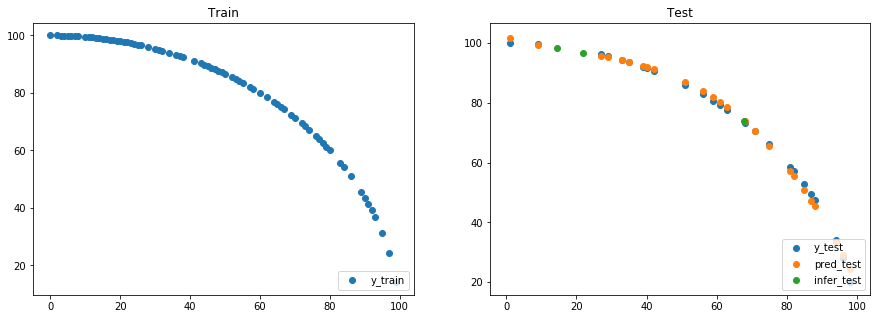

In [75]:
# 图例大小
plt.figure(figsize=(15,5))

# 画出训练数据
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
#plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 画出测试数据
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
#plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.scatter(X_test, pred_test, label="pred_test")
plt.scatter(X_infer, pred_infer, label="infer_test")
plt.legend(loc='lower right')

# 显示图例
plt.show()

[98.22029461 96.70011637 73.9521148 ]


,X,y
0,0.0,100.000000
1,1.0,99.995000
2,2.0,99.979998
